<a href="https://colab.research.google.com/github/enzo-vargas/EnzoVargas_DataScience/blob/master/Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro_%5BEnzo_Vargas%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Primeiro vamos importar as bibliotecas que serão utilizadas:

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` = número de identificação dos imóveis
*`name` = nome do imóvel anunciado	
* `host_id` = número de identificação do proprietário do imóvel
* `host_name` = Nome do proprietário do imóvel
*`neighbourhood_group` = Esta coluna não possui valor válido
*`neighbourhood` = Nome do bairro onde está localizado o imóvel
*`latitude` = Coordenada da latitude do imóvel
*	`longitude` = Coordenada da longitude do imóvel
*	`room_type` = Informação do tipo de quarto oferecido
*	`price` = Preço de aluguel imóvel
*`minimum_nights` = Quantidade mínima de noites exigidas para reservar o imóvel
*	`number_of_reviews` = número de avaliações recebidas pelo imóvel
*	`last_review` = Data da última avaliação
*	`reviews_per_month` = Quantidade de avaliações por mês
*`calculated_host_listings_count` = Quantidade de móveis do mesmo proprietário
*`availability_365` = Número de dias de disponibilidade do imóvel dentro de 365 dias 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas:{df.shape[0]}')
print(f'Variáveis:{df.shape[1]}')
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:35870
Variáveis:16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.

* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

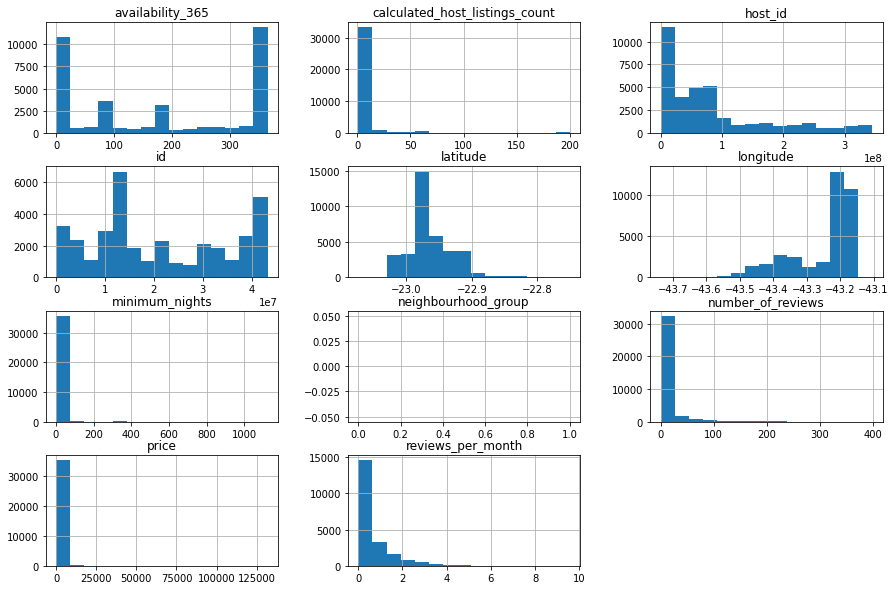

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price',
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


#### Boxplot para minimum_nights

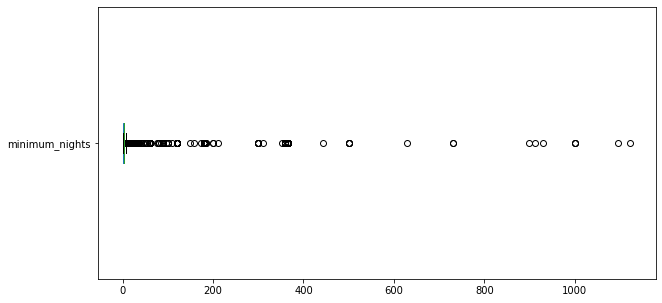

minimum_nights: valores acima de 30: 
224 entradas
0.6245%


In [9]:
#minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(10,5))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30: \n{} entradas'.format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

####Boxplot para price

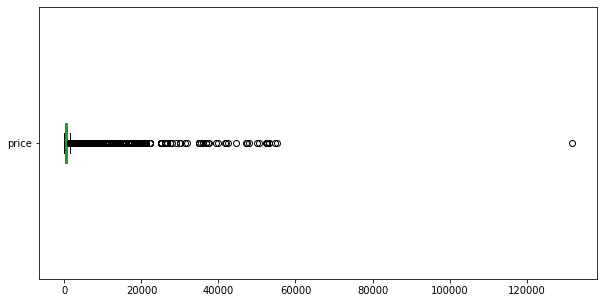

price: valores acima de 30: 
3360 entradas
9.3672%


In [10]:
#price
df.price.plot(kind='box',vert=False,figsize=(10,5))
plt.show()

# ver quantidade de valores acima de 1500 para price
print('price: valores acima de 30: \n{} entradas'.format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

####Histogramas sem *outliers*

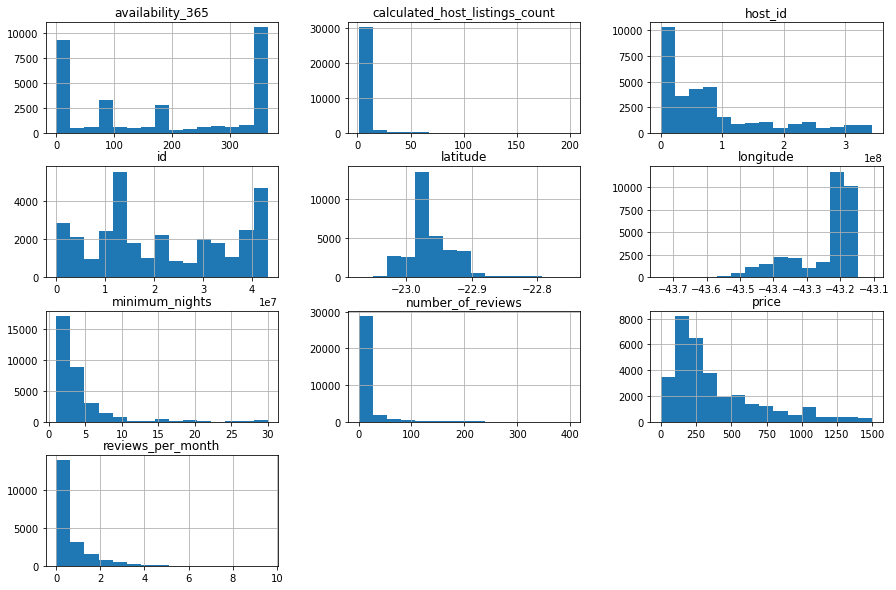

In [11]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30]. index, axis=0, inplace=True)

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15,figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`





In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


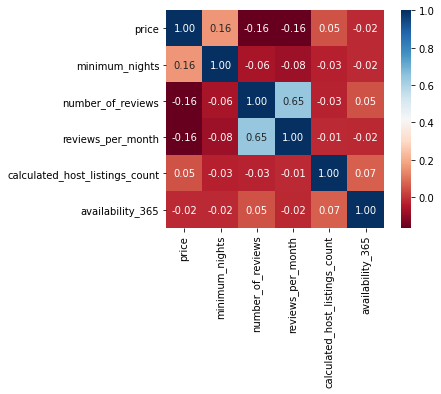

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap= 'RdBu', fmt='.2f', square=True, linecolor='white', annot= True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.693798
Private room       0.277575
Shared room        0.023675
Hotel room         0.004952
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio de Janeiro?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [23]:
# ver preços por bairros, na média
local = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
local

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

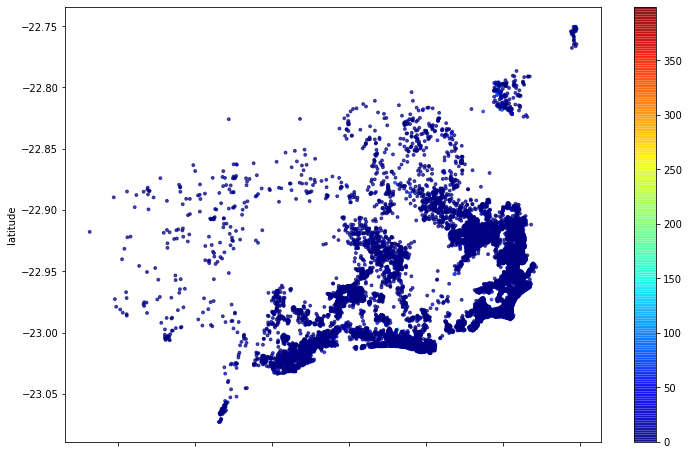

In [17]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',
              x='longitude',
              y='latitude',
              alpha=0.7, 
              c=df_clean['number_of_reviews'],
              s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Para vermos a média de uma variável podemos usar a função `mean()`. Abaixo é possível visualizar a média de noites mínimas exigidas para reservar um imóvel

In [27]:
# ver a média da coluna `minimum_nights``
print(f'Média de minimum_nights: {df_clean.minimum_nights.mean()}')


Média de minimum_nights: 3.4390009903441445


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.